# ML: Predicting Star Ratings


Our objective is to predict a new venue's popularity from information available when the venue opens.  We will do this by machine learning from a data set of venue popularities provided by Yelp.  The data set contains meta data about the venue (where it is located, the type of food served, etc.).  It also contains a star rating. Note that the venues are not limited to restaurants. This tutorial will walk you through one way to build a machine learning algorithm.


## Metrics and scoring

For most questions, you are asked to submit your models `predict` method to the grader. The grader uses a test set to evaluate your model's performance against our reference solution, using the $R^2$ score. It **is** possible to receive a score greater than one, indicating that you've beaten our reference model. We compare our model's score on a test set to your score on the same test set. See how high you can go!

## Download and parse the incoming data


We start by downloading the data set from Amazon S3:

The training data are a series of JSON objects, in a Gzipped file. Python supports Gzipped files natively: [`gzip.open`](https://docs.python.org/3/library/gzip.html) has the same interface as `open`, but handles `.gz` files automatically.

The built-in `json` package has a `loads` function that converts a JSON string into a Python dictionary. We could call that once for each row of the file. [`ujson`](http://docs.micropython.org/en/latest/library/ujson.html) has the same interface as the built-in `json` package, but is *substantially* faster (at the cost of non-robust handling of malformed JSON). We will use that inside a list comprehension to get a list of dictionaries:

In [3]:
import ujson as json
import gzip

with gzip.open('yelp_train_academic_dataset_business.json.gz') as f:
    data = [json.loads(line) for line in f]
    
print(data[:5])

[{'business_id': 'vcNAWiLM4dR7D2nwwJ7nCA', 'full_address': '4840 E Indian School Rd\nSte 101\nPhoenix, AZ 85018', 'hours': {'Tuesday': {'close': '17:00', 'open': '08:00'}, 'Friday': {'close': '17:00', 'open': '08:00'}, 'Monday': {'close': '17:00', 'open': '08:00'}, 'Wednesday': {'close': '17:00', 'open': '08:00'}, 'Thursday': {'close': '17:00', 'open': '08:00'}}, 'open': True, 'categories': ['Doctors', 'Health & Medical'], 'city': 'Phoenix', 'review_count': 7, 'name': 'Eric Goldberg, MD', 'neighborhoods': [], 'longitude': -111.983758, 'state': 'AZ', 'stars': 3.5, 'latitude': 33.499313, 'attributes': {'By Appointment Only': True}, 'type': 'business'}, {'business_id': 'JwUE5GmEO-sH1FuwJgKBlQ', 'full_address': '6162 US Highway 51\nDe Forest, WI 53532', 'hours': {}, 'open': True, 'categories': ['Restaurants'], 'city': 'De Forest', 'review_count': 26, 'name': 'Pine Cone Restaurant', 'neighborhoods': [], 'longitude': -89.335844, 'state': 'WI', 'stars': 4.0, 'latitude': 43.238893, 'attributes

In scikit-learn, the labels to be predicted, in this case, the stars, are always kept in a separate data structure than the features. Let's get in this habit now, by creating a separate list of the ratings.

In [4]:
star_ratings = [row['stars'] for row in data]
print(star_ratings[:5])

[3.5, 4.0, 4.0, 4.5, 4.0]


A few things to consider:

1. The test set used by the grader will be in the same form as `data`. For this miniproject, it will be a list of dictionaries. The models you will build will need to handle data of this type; we'll discuss this more further in the questions.
1. You may find it useful to serialize your trained model using either [`dill`](https://pypi.python.org/pypi/dill) or [`joblib`](http://scikit-learn.org/stable/modules/model_persistence.html). That way, you can reload your model after restarting the Jupyter notebook without needing to retrain it.
1. There are obvious mistakes in the data; there is no need to try to correct them.

# Questions


## Question 1: city_avg

The venues belong to different cities.  You can imagine that the ratings in some cities are probably higher than others.  We wish to build an estimator to make a prediction based on this, but first we need to work out the average rating for each city.  For this problem, create a list of tuples (city name, star rating), one for each city in the data set. There are many ways to do this; please feel free to experiment on your own.  If you get stuck, the steps below attempt to guide you through the process.

A simple approach is to go through all of the dictionaries in our array, calculating the sum of the star ratings and the number of venues for each city. At the end, we can just divide the stars by the count to get the average. We could create a separate sum and count variable for each city, but that will get tedious quickly. A better approach is to create a dictionary for each. The key will be the city name, and the value the running sum or running count.

One slight annoyance of this approach is that we will have to test whether a key exists in the dictionary before adding to the running tally.  The `collections` module's `defaultdict` class works around this by providing default values for keys that haven't been used. Thus, if we do

we can increment any key of `star_sum` or `count` without first worrying whether the key exists. We need to go through the `data` and `star_ratings` list together, which we can do with the `zip` function.

Now we can calculate the average ratings.  Again, a dictionary makes a good container.

There should be 167 different cities:

In [11]:
# printing calculated 'avg_stars' dictionary first five key (city) - value (avg_stars) pairs
for i in list(avg_stars)[0:5]:
    print(f"city: {i} | avg_stars {avg_stars[i]}")

city: Phoenix | avg_stars 3.6702903946388683
city: De Forest | avg_stars 3.75
city: Mc Farland | avg_stars 3.1
city: Middleton | avg_stars 3.611111111111111
city: Madison | avg_stars 3.6457337883959045


We can get that list of tuples by converting the returned view object from the `items` method into a list.

In [13]:
grader.score('ml__city_avg', list(avg_stars.items()))

Your score: 1.0000


## Question 2: city_model

...

## Question 3: lat_long_model

...

The code below will plot a rolling mean of the star ratings. Do you need to shuffle the data?

Text(0.5, 1.0, 'Raw Star Ratings as Cointained in the Raw Dataset')

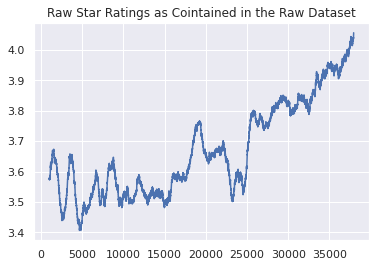

In [30]:
from pandas import Series
import matplotlib.pyplot as plt

plt.plot(Series.rolling(Series(star_ratings), window=1000).mean())
plt.title('Raw Star Ratings as Cointained in the Raw Dataset')

Once you've found a good value of `n_neighbors`, submit the model to the grader. Note, "good" is a relative measure here. The reference solution has an $R^2$ score of only 0.02. There is just rather little signal available for modeling.

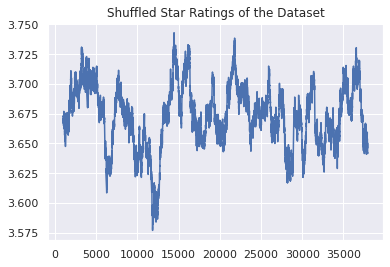

In [31]:
from sklearn.utils import shuffle

# X is data
# Y is star_ratings

X_data_shuffled, y_star_ratings_shuffled = shuffle(data, star_ratings, random_state=17)

plt.title('Shuffled Star Ratings of the Dataset')
plt.plot(Series.rolling(Series(y_star_ratings_shuffled), window=1000).mean())

...

## Question 4: category_model

While location is important, we could also try seeing how predictive the
venue's category is. Build an estimator that considers only the `'categories'` field of the data.

The categories come as a list of strings, but the scikit-learn's predictors all need numeric input. We ultimately want to create a column in our feature matrix to represent every category. For a given row, only the columns that represent the categories it contains will be filled with a one, otherwise, it will be filled with a zero. The described method is similar to **one-hot encoding**, however, an observation/row can contain more than one "hot", non-zero, column.

To achieve our encoding plan, we need to use scikit-learn's provides [`DictVectorizer`](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.DictVectorizer.html#sklearn.feature_extraction.DictVectorizer). This transformer takes a 1-D array of dictionaries and creates a column in the output matrix for each key in the dictionary and fills it with the value associated with it. Missing keys are filled with zeros. However, we need to build a transformer that takes an array of strings and returns an array of dictionaries with keys given by those strings and values of one. For example, it should transform `X_in` into `X_out`.

In [36]:
X_in = pd.Series([['a'], ['b', 'c']])
X_out = pd.Series([{'a': 1}, {'b': 1, 'c': 1}])

print(X_in)
print(X_out)

0       [a]
1    [b, c]
dtype: object
0            {'a': 1}
1    {'b': 1, 'c': 1}
dtype: object


In [37]:
class DictEncoder(BaseEstimator, TransformerMixin):
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        # X will be a pandas series. Return a pandas series of dictionaries
        encoded_dic = []
        for venue_cat in X:
            dic = {}
            for cat in venue_cat:
                dic.update({str(cat):1})
            encoded_dic.append(dic)
        return pd.Series(encoded_dic)

In [38]:
a = DictEncoder()
a = a.fit_transform(X_in)
print(a)


0            {'a': 1}
1    {'b': 1, 'c': 1}
dtype: object


Now let's test out that our `DictEncoder` works out as expected.

In [39]:
# Check that DictEncoder transforms a series of list of strings into the expected series of dictionaries
grader.check((DictEncoder().fit_transform(X_in) == X_out).all())

True

Now, create a pipeline object of the two step transformation for the categories data. Afterwards, create a `ColumnTransformer` object that will use the aforementioned pipeline object to transform the `'categories'` field.

In [40]:
from sklearn.linear_model import Ridge
from sklearn.feature_extraction import DictVectorizer
from sklearn.model_selection import cross_val_score

In [41]:
# selecting categories via selector & manual testing of pipeline 
categ_column = ['categories']
selector = ColumnTransformer([('selector', 'passthrough', categ_column)])

data_transform = to_data_frame.transform(data)
data_transform = selector.fit_transform(data_transform)
data_transform_encoded = DictEncoder().fit_transform(data_transform)
data_transform_encoded_vect = DictVectorizer().fit_transform(data_transform_encoded)

In [42]:
pipe = Pipeline([
    ('to_data_frame', ToDataFrame()),
    ('selector', selector),
    ('dict_encoder', DictEncoder()),
    ('dict_vect', DictVectorizer()),
    ('ridge_regressor', Ridge())
])

pipe.fit(data, star_ratings)
pipe.predict(test_data)

array([3.1809324 , 3.09890967, 3.21184384, 3.23431614, 3.33573607])

Finally, create a pipeline object that will
1. Convert our list of dictionaries into a data frame
1. Select the `'categories'` column and encode the data
1. Train a regularized linear model such as `Ridge`

There will be a large number of features, one for each category, so there is a significant danger of overfitting. Use cross validation to choose the best regularization parameter.

In [43]:
pipe_category_model = Pipeline([
    ('to_data_frame', ToDataFrame()),
    ('selector', selector),
    ('dict_encoder', DictEncoder()),
    ('dict_vect', DictVectorizer()),
    ('ridge_regressor', Ridge(alpha = 2.75))
])
pipe_category_model.fit(data, star_ratings)
pipe_category_model.predict(test_data)

array([3.19272754, 3.10523086, 3.21461783, 3.27040776, 3.33733994])

In [44]:
grader.score('ml__category_model', pipe_category_model.predict)  # Edit to appropriate name

Your score: 0.9973


**Extension:** Some categories (e.g., Restaurants) are not very specific. Others (Japanese sushi) are much more so.  One way to deal with this is with an measure call term frequency-inverse document frequency (tf-idf). Add in a [`TfidfTransformer`](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) between the `DictVectorizer` and the linear model, and see if that improves performance.

## Question 5: attribute_model

...

## Question 6: full_model

...

*Copyright &copy; 2022 Pragmatic Institute. This content is licensed solely for personal use. Redistribution or publication of this material in whole is strictly prohibited.*